# Final Project - SMS Spam Filtering
### 600.475 - Introduction to Machine Learning
### Archan Patel, et. al. 

We aim to create a simple binary spam classifier based on the UCI SMS Spam Collection Dataset. 

    https://www.kaggle.com/uciml/sms-spam-collection-dataset

Messages in the dataset are classifed as either "ham" for regular legitimate messages or spam. 


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
#from textblob import TextBlob
#import cPickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Data Input
First we read the data from the data/spam.csv as retrieve from Kaggle.
We then partition the data into training, validation, and testing sets. Much of the input and conversion to bag of words was taken from:

http://radimrehurek.com/data_science_python/

In [3]:
#read in csv, and take relevant columns
messages = pd.read_csv('./data/spam.csv',skiprows=1, names=["class", "text", "r1", "r2", 'r3'], encoding='latin-1')
del messages['r1']
del messages['r2']
del messages['r3']
#messages['v2'] =messages['v2'].astype(str)

#Add a length column
#messages['length'] = messages['text'].map(lambda text: len(text))
messages.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#TO-DO: add a feature for the size of the string

#Below code adds length to the chart above.
#print("Mean of ham length: "+str(np.mean(messages[messages['class']=='ham']['length'])))
#print("Mean of spam length: "+str(np.mean(messages[messages['class']=='spam']['length'])))
#messages.length.plot(bins=20, kind='hist')
#messages[messages['class']=='ham']['length']
#messages.hist(column='length', by='class', bins=50)


#Split into training and validation data
#TO-DO: SWITCH TO K-fold cross-validation, just used as a placeholder
X_train,X_test,y_train,y_test = train_test_split(messages["text"],messages["class"], test_size = 0.2, random_state = 10)

In [5]:
# Now we create a bag of words model.
# Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import TfidfVectorizer #Alternate Vectorizer, look at docs, not as good
vect = CountVectorizer(analyzer='word', ngram_range=(1, 3),stop_words='english') #uses 1 - 3 word length grams
vect.fit(X_train)
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)

### Data Format
Here we can determine a representation for raw text of the text messages. The methods used for the representation of text will determine the features of our data.

The following representations where used:

| Representation       | How it works   |
| ------------- |:-------------:|
| Bag of Words      | [stuff] |
|       | [stuff]      |
|  | [stuff]      |

# Multinomial Naive Bayes

In [27]:
prediction = dict() # Holds all classes for prediction.

#really simple to create a model and train it.
model = MultinomialNB()
model.fit(X_train_df, y_train)
prediction["MultinomialNB"] = model.predict(X_test_df)

accuracy_score(y_test, prediction["MultinomialNB"])

0.98923766816143499

In [143]:
#y_test less than actual prediction
#i.e. prediction = 1 (spam), y_test = 0 (ham)
X_test[y_test < prediction["MultinomialNB"] ]

693     Will purchase d stuff today and mail to you. D...
5475    Dhoni have luck to win some big title.so we wi...
4860                               Nokia phone is lovly..
Name: text, dtype: object

In [144]:
# Prediction ham, actually Spam
X_test[y_test > prediction["MultinomialNB"] ]

5035    You won't believe it but it's true. It's Incre...
3130    LookAtMe!: Thanks for your purchase of a video...
2002    TheMob>Yo yo yo-Here comes a new selection of ...
68      Did you hear about the new \Divorce Barbie\"? ...
2662    Hello darling how are you today? I would love ...
4211    Missed call alert. These numbers called but le...
3572    You won't believe it but it's true. It's Incre...
4912    Goal! Arsenal 4 (Henry, 7 v Liverpool 2 Henry ...
3979                                   ringtoneking 84484
Name: text, dtype: object

In [142]:
#Confusion matrix
conf_mat = confusion_matrix(y_test, prediction['MultinomialNB'])
conf_mat

array([[962,   3],
       [  9, 141]])

In [94]:
model = BernoulliNB()
model.fit(X_train_df, y_train)
prediction["BernoulliNB"] = model.predict(X_test_df)

accuracy_score(y_test, prediction["BernoulliNB"])

0.97309417040358748

In [95]:
conf_mat = confusion_matrix(y_test, prediction['BernoulliNB'])
conf_mat

array([[965,   0],
       [ 30, 120]])

# Classification via Multi-layer Perceptron

In [145]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X_train_df, y_train)
prediction["NeuralNet"] = model.predict(X_test_df)

accuracy_score(y_test, prediction["NeuralNet"])


#TBH I think this is the bayes Risk without adding additional features

0.96771300448430497

In [86]:
#Prediction ham, actually Spam
X_test[y_test > prediction["NeuralNet"] ]

5035    You won't believe it but it's true. It's Incre...
1153    1000's of girls many local 2 u who r virgins 2...
3130    LookAtMe!: Thanks for your purchase of a video...
1506    Thanks for the Vote. Now sing along with the s...
2002    TheMob>Yo yo yo-Here comes a new selection of ...
68      Did you hear about the new \Divorce Barbie\"? ...
2662    Hello darling how are you today? I would love ...
4211    Missed call alert. These numbers called but le...
3572    You won't believe it but it's true. It's Incre...
4912    Goal! Arsenal 4 (Henry, 7 v Liverpool 2 Henry ...
2913    Sorry! U can not unsubscribe yet. THE MOB offe...
3979                                   ringtoneking 84484
4014    You will be receiving this week's Triple Echo ...
Name: text, dtype: object

In [83]:
print y_test.shape
print prediction["MultinomialNB"].shape

(1115,)
(1115,)


# Classification via K Nearest Neighbors

First, run the classifier.

In [100]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train_df, y_train)
prediction["KNN"] = model.predict(X_test_df)

accuracy_score(y_test, prediction["KNN"])

0.89327354260089686

Now, let's look at the data.

In [102]:
X_test[prediction["KNN"] == u'spam']

4353    important information 4 orange user 0789xxxxxx...
867     PRIVATE! Your 2003 Account Statement for 07808...
2310    You have won a Nokia 7250i. This is what you g...
2112    You are a winner you have been specially selec...
4515    Congrats! 2 mobile 3G Videophones R yours. cal...
1886    Dear 0776xxxxxxx U've been invited to XCHAT. T...
4106    HOT LIVE FANTASIES call now 08707500020 Just 2...
2472    Final Chance! Claim ur å£150 worth of discount...
1852    This is the 2nd time we have tried 2 contact u...
2663    8007 FREE for 1st week! No1 Nokia tone 4 ur mo...
1622    U have a secret admirer who is looking 2 make ...
4575    Congratulations ur awarded 500 of CD vouchers ...
4989    Phony å£350 award - Todays Voda numbers ending...
2249    Thanks for your ringtone order, ref number R83...
2353    Please CALL 08712402902 immediately as there i...
2093    Final Chance! Claim ur å£150 worth of discount...
1104    Message Important information for O2 user. Tod...
4197    Want t

In [81]:
print y_test > prediction["KNN"]

4635    False
2279    False
4545    False
5084    False
5298    False
1217    False
3222    False
3172     True
4513    False
5476    False
1164    False
3128    False
502     False
955     False
4108    False
4398    False
48      False
2341    False
404     False
3513    False
1029    False
970     False
3767    False
5035     True
3114    False
474     False
3907    False
4280    False
4958    False
341     False
        ...  
5528    False
5497     True
2046    False
4402    False
2864    False
2785    False
5537     True
4885    False
4414    False
2008    False
4320    False
857     False
1657    False
1776     True
3025    False
5003    False
969     False
735     False
1109    False
4583    False
4798    False
3318    False
4944    False
3686    False
3046    False
2357    False
1174    False
192     False
3606    False
3831    False
Name: class, dtype: bool


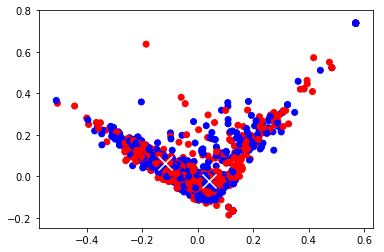

In [54]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X = pipeline.fit_transform(X_train).todense()

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1], c=['b','r'])
kmeans = KMeans(n_clusters=2).fit(X)
centers2D = pca.transform(kmeans.cluster_centers_)

plt.scatter(centers2D[:,0], centers2D[:,1], 
            marker='x', s=200, linewidths=3, c='w')
plt.show()

In [85]:
print y_test.shape
print prediction['KNN'].shape

(1115,)
(1115,)


UnicodeDecodeError: 'ascii' codec can't decode byte 0xe0 in position 6: ordinal not in range(128)

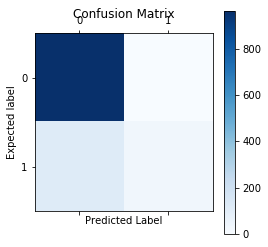

In [115]:
plt.matshow(confusion_matrix(y_test, prediction["KNN"]), cmap=plt.cm.Blues, interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('Expected label')
plt.xlabel('Predicted Label')
tick_marks = messages['class']
plt.xticks(tick_marks)
plt.yticks(tick_marks)
plt.show()